In [1]:
import numpy as np
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,roc_curve,auc
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
 
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
X = np.concatenate((x_train, x_test))
X.shape

(70000, 28, 28)

In [5]:
y = np.concatenate([y_train, y_test])
y.shape

(70000,)

First of all, we downloaded MNIST data 

### Dividing dataset into a training set (80%), an evaluation set (10%) and a test set (10%)

In [6]:
train_ratio = 0.9
test_ratio = 0.1

# train is now 80% of the entire data set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 1 - train_ratio)

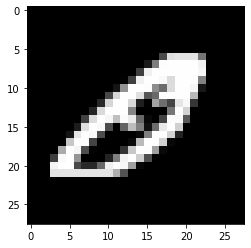

In [7]:
plt.imshow(x_train[0], cmap='gray')

In [8]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255


# images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [9]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [37]:
def predict_model(model, callbacks = [],batch_size=128, epochs = 4,lr=0.001):
    adam = keras.optimizers.Adam(lr=lr)
    model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy", "Precision","Recall"])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.11, callbacks=callbacks)
    score = model.evaluate(x_test, y_test, verbose=0)
    y_pred = model.predict(x_test)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("Test precision:", score[2])
    print("Test recall:", score[3])
    #print(y_test)
    
    y_pred = np.argmax(y_pred,axis=1)
    #y_pred = keras.utils.to_categorical(y_pred, num_classes)
    y_test1 = np.argmax(y_test,axis=1)
    
    print("Test f1 score:", f1_score(y_test1,y_pred,average='micro'))
    for i in range(10):
        temp_pred = [1 if x==i else 0 for x in y_pred]
        temp_test = [1 if x==i else 0 for x in y_test1]
        fpr, tpr, thresholds =roc_curve(temp_test,temp_pred)

        print("Test AUC for digit:",i, auc(fpr, tpr))
    
    # list all data in history
    #print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

In [45]:
# simple early stopping
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 3, restore_best_weights=True)

### Basic Fully Connected Multi-layer Network

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 28, 28, 32)        64        
_________________________________________________________________
dense_39 (Dense)             (None, 28, 28, 64)        2112      
_________________________________________________________________
flatten_13 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_40 (Dense)             (None, 128)               6422656   
_________________________________________________________________
dropout_12 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 10)                1290      
Total params: 6,426,122
Trainable params: 6,426,122
Non-trainable params: 0
___________________________________________

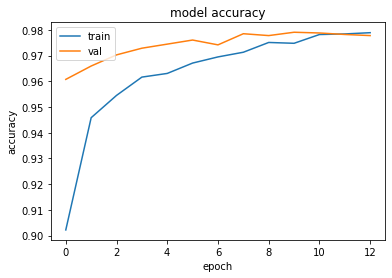

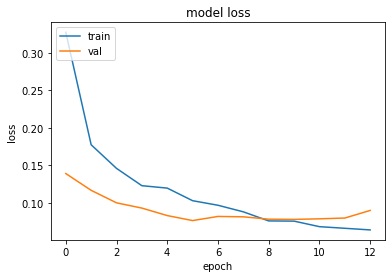

In [36]:
model_fc = keras.Sequential([
    layers.Dense(32, activation="relu",input_shape=(28,28,1)),
    layers.Dense(64, activation="relu"),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.25),
    layers.Dense(10, activation="softmax")
]) 
model_fc.summary()
predict_model(model_fc, [es], epochs=100)

### TODO More complex model 
- demonstrate  the  effects  of  changing  the  number  of layers  (+1)  
- the  number  of  units  per  layer  (+1),  learning  with  different  learning  rates  (+1)  
- using different  optimization  techniques,  by  providing Accuracy, Precision,  Recall,  F1, and AUC  for  ROC curves for each network. 

### Different number of layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 28, 28, 32)        64        
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1605696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 1,606,410
Trainable params: 1,606,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
439/439 [==============================] - 11s 22ms/step - loss: 0.5918 - accuracy: 0.8171 - preci

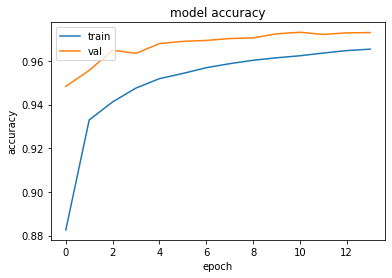

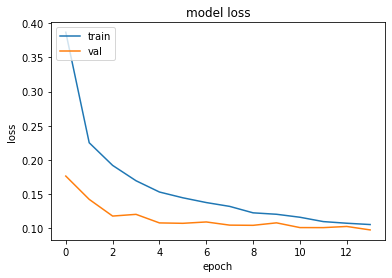

In [13]:
model_fc_small = keras.Sequential([
    layers.Dense(32, activation="relu",input_shape=(28,28,1)),
    
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(.25),
    layers.Dense(10, activation="softmax")
]) 
model_fc_small.summary()
predict_model(model_fc_small, [es], epochs=100)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 28, 28, 32)        64        
_________________________________________________________________
dense_8 (Dense)              (None, 28, 28, 64)        2112      
_________________________________________________________________
flatten_2 (Flatten)          (None, 50176)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 4096)              205524992 
_________________________________________________________________
dense_10 (Dense)             (None, 1024)              4195328   
_________________________________________________________________
dense_11 (Dense)             (None, 64)                65600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)               

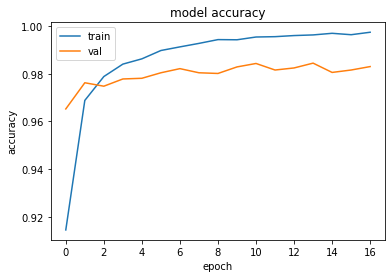

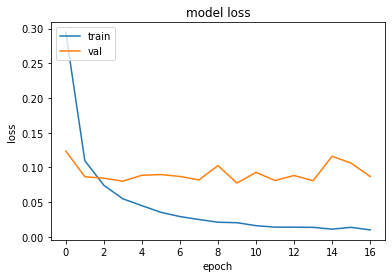

In [14]:
model_fc_large = keras.Sequential([
    layers.Dense(32, activation="relu",input_shape=(28,28,1)),
    layers.Dense(64, activation="relu"),
    layers.Flatten(),
    layers.Dense(4096, activation="relu"),
    layers.Dense(1024, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dropout(.25),
    layers.Dense(10, activation="softmax")
]) 
model_fc_large.summary()
predict_model(model_fc_large, [es], epochs=100)

### Different number of units

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 28, 28, 10)        20        
_________________________________________________________________
dense_14 (Dense)             (None, 28, 28, 20)        220       
_________________________________________________________________
flatten_3 (Flatten)          (None, 15680)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 40)                627240    
_________________________________________________________________
dropout_3 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 10)                410       
Total params: 627,890
Trainable params: 627,890
Non-trainable params: 0
________________________________________________

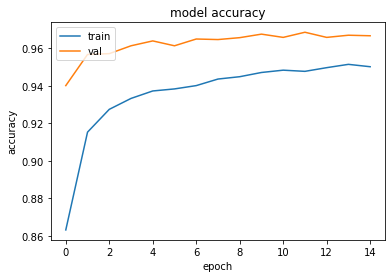

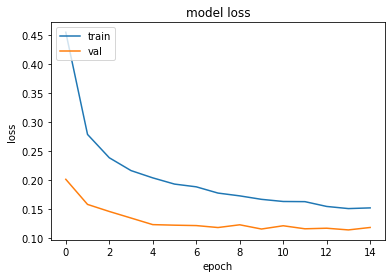

In [15]:
model_fc = keras.Sequential([
    layers.Dense(10, activation="relu",input_shape=(28,28,1)),
    layers.Dense(20, activation="relu"),
    
    layers.Flatten(),
    layers.Dense(40, activation="relu"),
    layers.Dropout(.25),
    layers.Dense(10, activation="softmax")
]) 
model_fc.summary()
predict_model(model_fc, [es], epochs=100)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 28, 28, 100)       200       
_________________________________________________________________
dense_18 (Dense)             (None, 28, 28, 200)       20200     
_________________________________________________________________
flatten_4 (Flatten)          (None, 156800)            0         
_________________________________________________________________
dense_19 (Dense)             (None, 400)               62720400  
_________________________________________________________________
dropout_4 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 10)                4010      
Total params: 62,744,810
Trainable params: 62,744,810
Non-trainable params: 0
__________________________________________

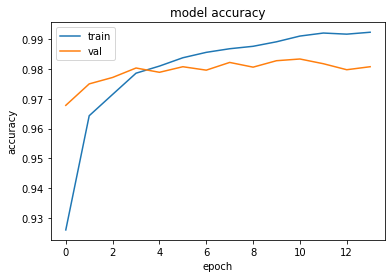

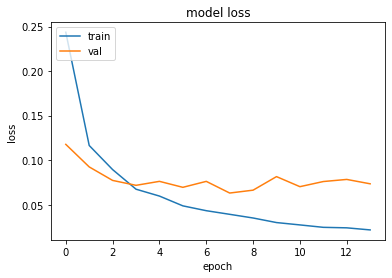

In [16]:
model_fc = keras.Sequential([
    layers.Dense(100, activation="relu",input_shape=(28,28,1)),
    layers.Dense(200, activation="relu"),
    
    layers.Flatten(),
    layers.Dense(400, activation="relu"),
    layers.Dropout(.25),
    layers.Dense(10, activation="softmax")
]) 
model_fc.summary()
predict_model(model_fc, [es], epochs=100)

### Different learning rate

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 28, 28, 32)        64        
_________________________________________________________________
dense_51 (Dense)             (None, 28, 28, 64)        2112      
_________________________________________________________________
flatten_16 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               6422656   
_________________________________________________________________
dropout_15 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 10)                1290      
Total params: 6,426,122
Trainable params: 6,426,122
Non-trainable params: 0
___________________________________________

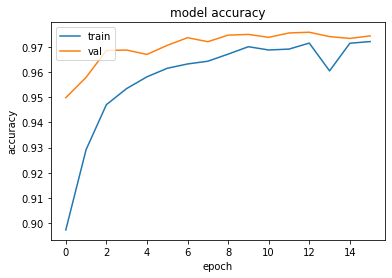

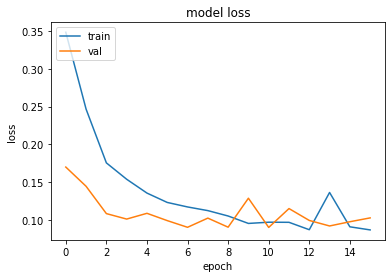

In [40]:
model_fc_01 = keras.Sequential([
    layers.Dense(32, activation="relu",input_shape=(28,28,1)),
    layers.Dense(64, activation="relu"),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.25),
    layers.Dense(10, activation="softmax")
]) 
model_fc_01.summary()
predict_model(model_fc_01,[es], epochs=100, lr=0.02)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_46 (Dense)             (None, 28, 28, 32)        64        
_________________________________________________________________
dense_47 (Dense)             (None, 28, 28, 64)        2112      
_________________________________________________________________
flatten_15 (Flatten)         (None, 50176)             0         
_________________________________________________________________
dense_48 (Dense)             (None, 128)               6422656   
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                1290      
Total params: 6,426,122
Trainable params: 6,426,122
Non-trainable params: 0
___________________________________________

439/439 [==============================] - 5s 12ms/step - loss: 0.1395 - accuracy: 0.9596 - precision: 0.9680 - recall: 0.9526 - val_loss: 0.1241 - val_accuracy: 0.9645 - val_precision: 0.9722 - val_recall: 0.9595
Epoch 33/100
439/439 [==============================] - 5s 12ms/step - loss: 0.1311 - accuracy: 0.9620 - precision: 0.9695 - recall: 0.9547 - val_loss: 0.1213 - val_accuracy: 0.9659 - val_precision: 0.9721 - val_recall: 0.9609
Epoch 34/100
439/439 [==============================] - 5s 12ms/step - loss: 0.1297 - accuracy: 0.9622 - precision: 0.9695 - recall: 0.9555 - val_loss: 0.1186 - val_accuracy: 0.9649 - val_precision: 0.9721 - val_recall: 0.9605
Epoch 35/100
439/439 [==============================] - 5s 12ms/step - loss: 0.1279 - accuracy: 0.9621 - precision: 0.9696 - recall: 0.9551 - val_loss: 0.1162 - val_accuracy: 0.9668 - val_precision: 0.9726 - val_recall: 0.9629
Epoch 36/100
439/439 [==============================] - 5s 12ms/step - loss: 0.1146 - accuracy: 0.9653 - 

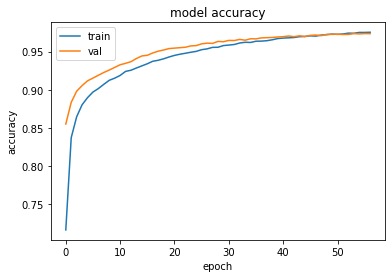

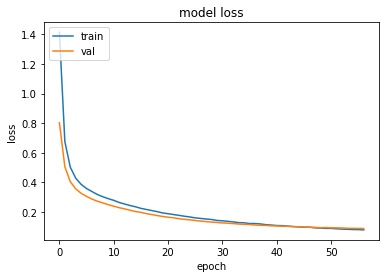

In [39]:
model_fc_00001 = keras.Sequential([
    layers.Dense(32, activation="relu",input_shape=(28,28,1)),
    layers.Dense(64, activation="relu"),
    
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.25),
    layers.Dense(10, activation="softmax")
]) 
model_fc_00001.summary()
predict_model(model_fc_00001,[es], epochs=100, lr = 0.00001)

### Basic Multi-layer CNN

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 10)               

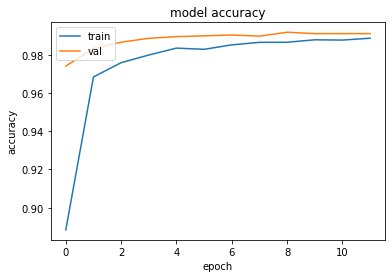

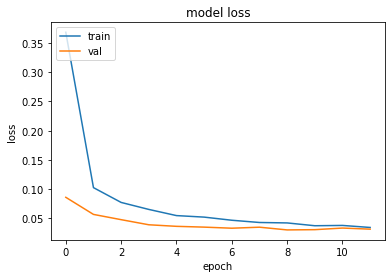

In [17]:
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D (2,2),  
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D (2,2),   

    layers.Flatten(),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model_cnn.summary()
predict_model(model_cnn, [es], epochs=100)

### TODO More complex model 
- demonstrate  the  effects  of  changing  the number of convolutional layers (+1)  
- the number of filters per layer (+1), different types and sizes of pooling layers (+1)
- and number of fully connected layers (+1)
- using different  optimization  techniques,  by  providing Accuracy, Precision,  Recall,  F1, and AUC  for  ROC curves for each network. 

### Different number of convolutional layers

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
439/439 [==============================] - 4s 8ms/step - loss: 0.7126 - accuracy: 0.7976 - precision: 0.

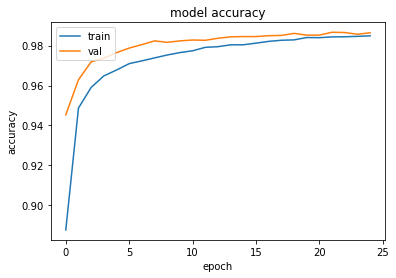

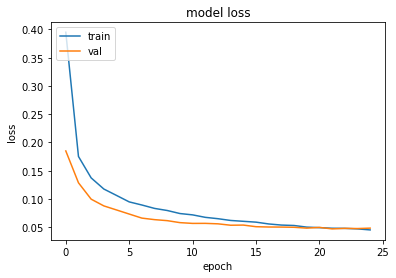

In [18]:
model_cnn_short = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D (2,2),

    layers.Flatten(),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model_cnn_short.summary()
predict_model(model_cnn_short, [es], epochs=100)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 23, 23, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 19, 19, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 17, 17, 512)      

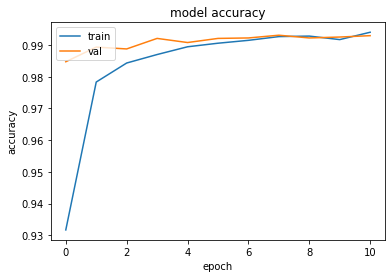

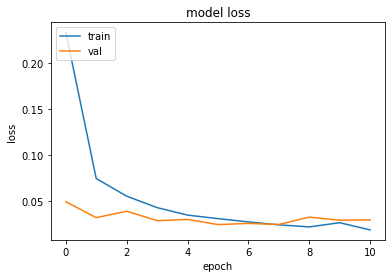

In [19]:
model_cnn_long = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D ((2,2),1),  
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D ((2,2),1), 
    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D ((2,2),1),  
    layers.Conv2D(512, (3,3), activation="relu"),
    layers.MaxPooling2D ((2,2),1), 

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model_cnn_long.summary()
predict_model(model_cnn_long, [es], epochs=100)

### Different number of filters per layer

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 4)         40        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 4)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 11, 11, 16)        592       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)               0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 10)               

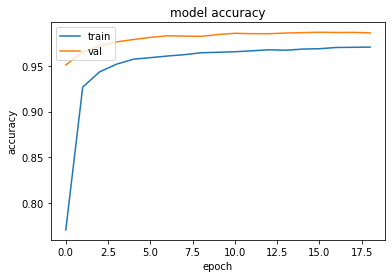

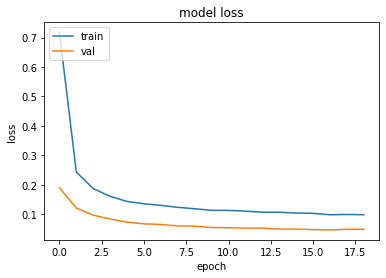

In [21]:
model_cnn_min = keras.Sequential([
    layers.Conv2D(4, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D (2,2),  
    layers.Conv2D(16, (3,3), activation="relu"),
    layers.MaxPooling2D (2,2),   

    layers.Flatten(),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model_cnn_min.summary()
predict_model(model_cnn_min, [es], epochs=100)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 512)       590336    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 512)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 12800)             0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12800)             0         
_________________________________________________________________
dense_29 (Dense)             (None, 10)              

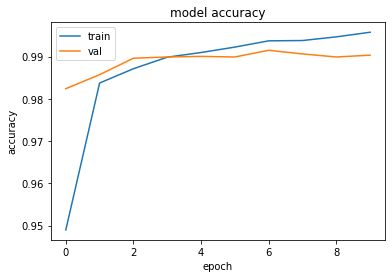

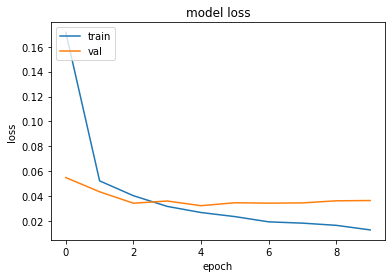

In [22]:
model_cnn_max = keras.Sequential([
    layers.Conv2D(128, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D (2,2),  
    layers.Conv2D(512, (3,3), activation="relu"),
    layers.MaxPooling2D (2,2),   

    layers.Flatten(),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model_cnn_max.summary()
predict_model(model_cnn_max, [es], epochs=100)

### different size and type of pooling layers

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_17 (Flatten)         (None, 64)                0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 10)              

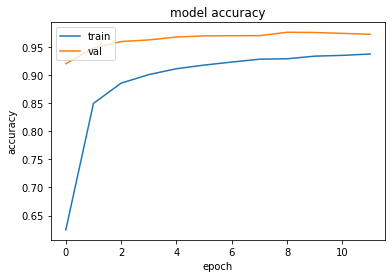

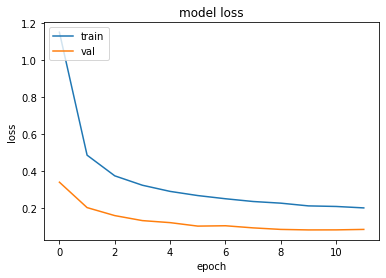

In [41]:
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D (5,3),  
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D (5,3),   

    layers.Flatten(),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model_cnn.summary()
predict_model(model_cnn, [es], epochs=100)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
average_pooling2d_2 (Average (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 6, 6, 64)          18496     
_________________________________________________________________
average_pooling2d_3 (Average (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 256)               0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_55 (Dense)             (None, 10)              

Epoch 00031: early stopping
Test loss: 0.05266290158033371
Test accuracy: 0.9857142567634583
Test precision: 0.9866762161254883
Test recall: 0.9838571548461914
Test f1 score: 0.9857142857142858
Test AUC for digit: 0 0.9975965630331252
Test AUC for digit: 1 0.9964337348028355
Test AUC for digit: 2 0.9899322237602509
Test AUC for digit: 3 0.9902563737312167
Test AUC for digit: 4 0.993108146858049
Test AUC for digit: 5 0.992317975361152
Test AUC for digit: 6 0.9943650793650793
Test AUC for digit: 7 0.9950732539562421
Test AUC for digit: 8 0.9821428571428572
Test AUC for digit: 9 0.9892405775544455


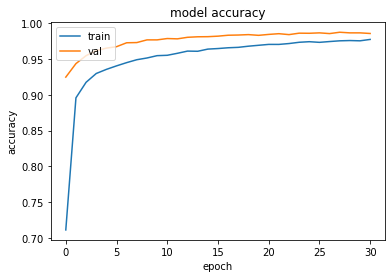

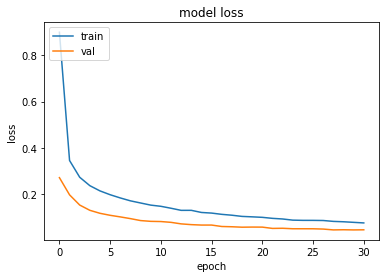

In [42]:
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.AveragePooling2D (3,3),  
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.AveragePooling2D (3,3),   

    layers.Flatten(),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model_cnn.summary()
predict_model(model_cnn, [es], epochs=100)

### number of full conected layers

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_56 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_57 (Dense)             (None, 32)              

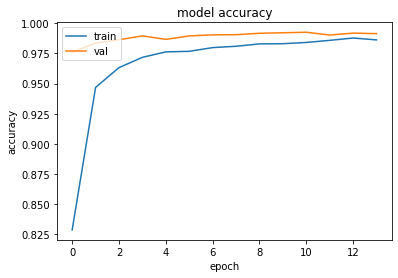

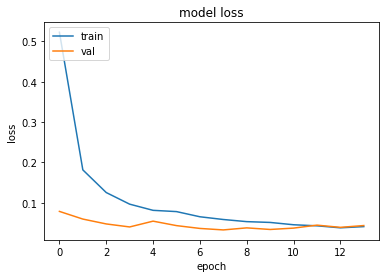

In [44]:
model_cnn_fc = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D (2,2),  
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D (2,2),   

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dropout(.5),
    layers.Dense(10, activation="softmax")
])
model_cnn_fc.summary()
predict_model(model_cnn_fc, [es], epochs=100)

### TODO Demonstrate the effects for different values of dropout

## Document the performance of a published network (LeNet5, VGG, Yolo, etc) for recognizing MNIST Digits

### LeNet5

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 13, 13, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_26 (Dense)             (None, 84)               

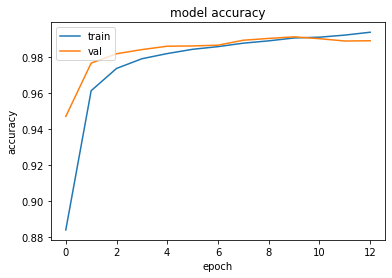

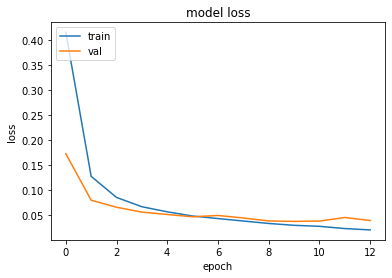

In [20]:
lenet5 = keras.Sequential([
    layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    layers.AveragePooling2D(),
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.AveragePooling2D(),
    
    layers.Flatten(),
    
    layers.Dense(units=120, activation='relu'),
    layers.Dense(units=84, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])

lenet5.summary()
predict_model(lenet5, [es], epochs=100)

### TODO Use your best network to build a real time system to recognize your own hand written digits

### SHAP Explainer
https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/PyTorch%20Deep%20Explainer%20MNIST%20example.html

https://shap.readthedocs.io/en/latest/example_notebooks/image_examples/image_classification/Multi-input%20Gradient%20Explainer%20MNIST%20Example.html

https://www.kaggle.com/lomen0857/explaining-cnn-using-shap

In [46]:
import shap
import numpy as np

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
e = shap.DeepExplainer(model, background)
# ...or pass tensors directly
# e = shap.DeepExplainer((model.layers[0].input, model.layers[-1].output), background)
shap_values = e.shap_values(x_test[1:5])

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

NameError: name 'model' is not defined